# SIMPLE LINEAR REGRESSION

X - INPUT INDEPENDENT VARIABLE

Y - DEPENDENT VARIABLE

Y = W1 * X + W0

PART I:

In this part of experiment, you will implement linear regression with a one variable to
prediction of Graduate Admission from an Indian perspective. Suppose you are the student
and seeking admission to oversea university for your PG programs. You have data set of
GRE score of students (out of 340) and chance of Admit (ranging from 0 to 1).
You would like to use this data set to predict what is your chance to Admit in oversea
university based on your GRE score.
The file GREdata.csv contains the dataset for our linear regression problems. The first
column is the GRE score of students and second column is chance of Admit.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
admission_data = pd.read_csv('Admission_Predict.csv - Admission_Predict.csv.csv')

In [3]:
admission_data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
admission_data.shape

(400, 9)

1) Plotting of Data:

Before starting on any task, it is often useful to understand the data by visualizing it.
For this dataset, you can use a scatter plot to visualize the data, since it has only two
properties to plot (GRE Score and Chance to Admit).

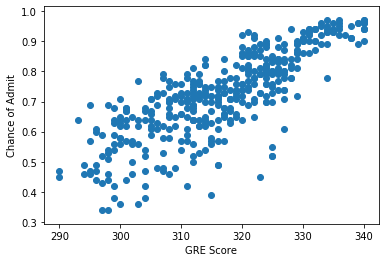

In [6]:
plt.scatter(admission_data['GRE Score'],admission_data['Chance of Admit'])
plt.xlabel('GRE Score')
plt.ylabel('Chance of Admit')
plt.show()

2) Gradient Descent:

In this part, you will fit the linear regression parameters θ to our dataset using gradient
descent.

A) Initialize the theta and learning rate
B) Fix some iteration
C) Compute cost function.

In [40]:
import numpy as np
# y = w_0 + w_1 * x
def get_cost(theta,X,Y):
    cost = 0
    for i in range(len(X)):
        y_pred = np.dot(theta.T,X[i])
        cost+= (Y[i] - y_pred)**2
    return cost/(2*len(X))

In [33]:
import numpy as np

X = np.ones(400)
X = np.array(list(zip(X,admission_data['GRE Score'])))
Y = admission_data['Chance of Admit'].values

In [43]:
theta = np.zeros(2)
print(get_cost(theta,X,Y))
theta = np.array([-1,2])
print(get_cost(theta,X,Y))

0.2724847500000002
199902.91783474985


In [165]:
import numpy as np
def gradient_descent(X,Y):
    learning_rate = 0.000001
    iterations = 100
    theta = np.zeros(2)
    
    costs = []
    cost = get_cost(theta,X,Y)
    costs.append(cost)
    
    for i in range(iterations):
        #weights updation
        theta = theta + (learning_rate/len(X)) * np.sum((np.repeat(Y - (np.dot(theta,X.T)),X.shape[1]).reshape(X.shape) * X),axis = 0)
        cost = get_cost(theta,X,Y)
        costs.append(cost)
    return costs,theta

In [166]:
costs,theta = gradient_descent(X,Y)

In [168]:
y_pred = np.matmul(theta,X.T)

In [172]:
print(round(theta[0],6),round(theta[1],6))

7e-06 0.002296


In [173]:
prediction_dataframe = pd.DataFrame(data=list(zip(admission_data['GRE Score'],y_pred,admission_data['Chance of Admit'])),
                                    columns=['GRE Score','Predicted Chance of Admit','Chance of Admit'])

In [174]:
prediction_dataframe

,GRE Score,Predicted Chance of Admit,Chance of Admit
0,337,0.773884,0.92
1,324,0.744031,0.76
2,316,0.725660,0.72
3,322,0.739439,0.80
4,314,0.721068,0.65
5,330,0.757810,0.90
6,321,0.737142,0.75
7,308,0.707289,0.68
8,302,0.693511,0.50
9,323,0.741735,0.45


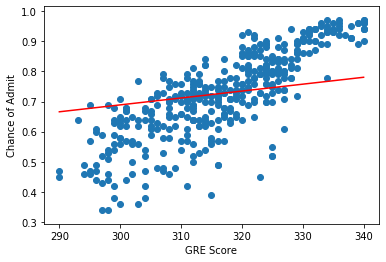

In [169]:
plt.scatter(admission_data['GRE Score'],admission_data['Chance of Admit'])
plt.xlabel('GRE Score')
plt.ylabel('Chance of Admit')
plt.plot([i[0] for i in x],[i[1] for i in x],color = 'Red')
plt.show()